In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import seaborn as sns
import pytz

In [ ]:
df = pd.read_csv(r'/content/DSP_Data (1).csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')

In [ ]:
start_date = pd.to_datetime('2023-10-19', utc=True)
end_date = pd.to_datetime('2023-11-01', utc=True)
selected_week = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [ ]:
# Conversion factor from Pascal to atm
conversion_factor = 1 / 1013.25

# Convert the pressure column in the DataFrame
df['pressure'] = df['pressure'] * conversion_factor
df['altitude'] = ((df['altitude'] * conversion_factor) * -1)

In [ ]:
df.head()

Date  temperature    pressure   altitude
0 2023-10-19 22:39:20+00:00         30.8  100.049346  61.353546
1 2023-10-19 22:54:25+00:00         29.8  100.041451  61.352953
2 2023-10-19 22:54:31+00:00         29.8  100.025660  61.351177
3 2023-10-19 23:15:48+00:00         29.1  100.037503  61.352361
4 2023-10-19 23:16:39+00:00         29.1  100.036516  61.351374

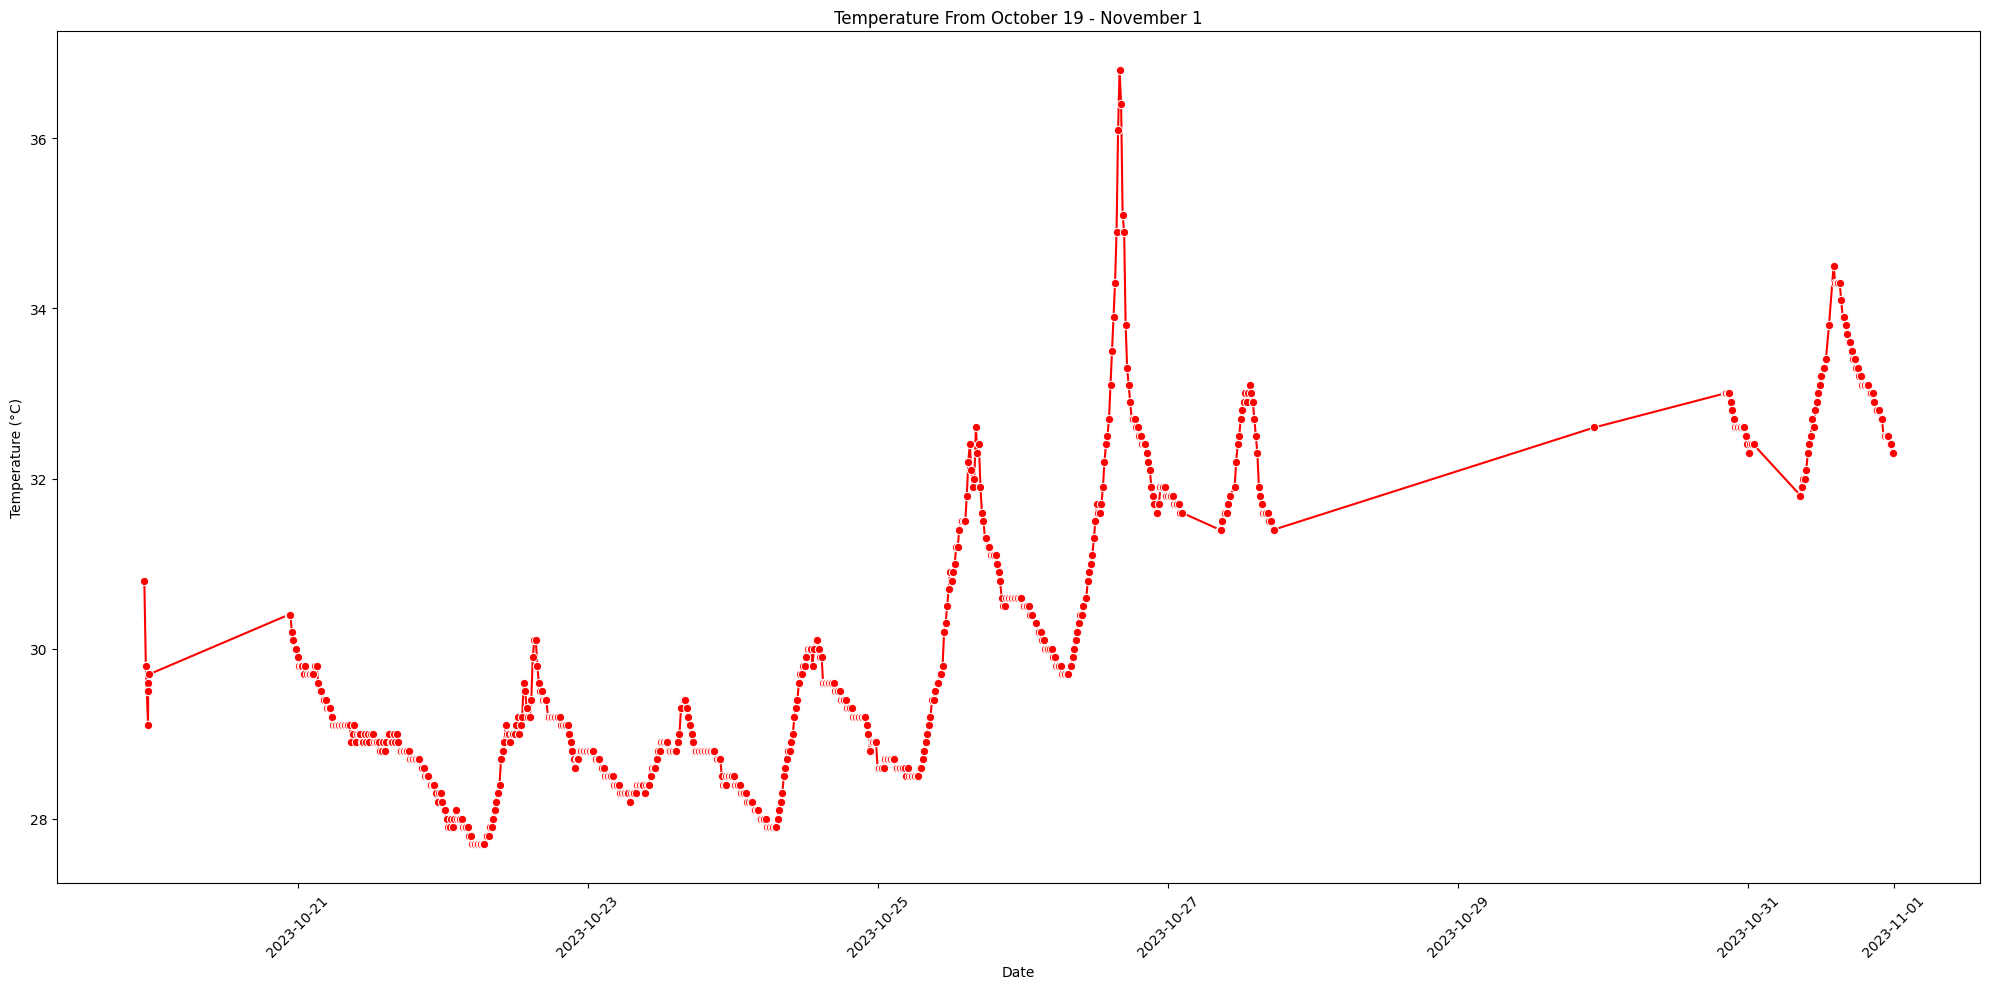

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Temperature From October 19 - November 1")
sns.lineplot(x='Date', y='temperature', data=selected_week, marker='o', color='red')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

<ipython-input-8-ce6f59276cb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_week['temperature'] = selected_week['temperature'].interpolate(method='linear')


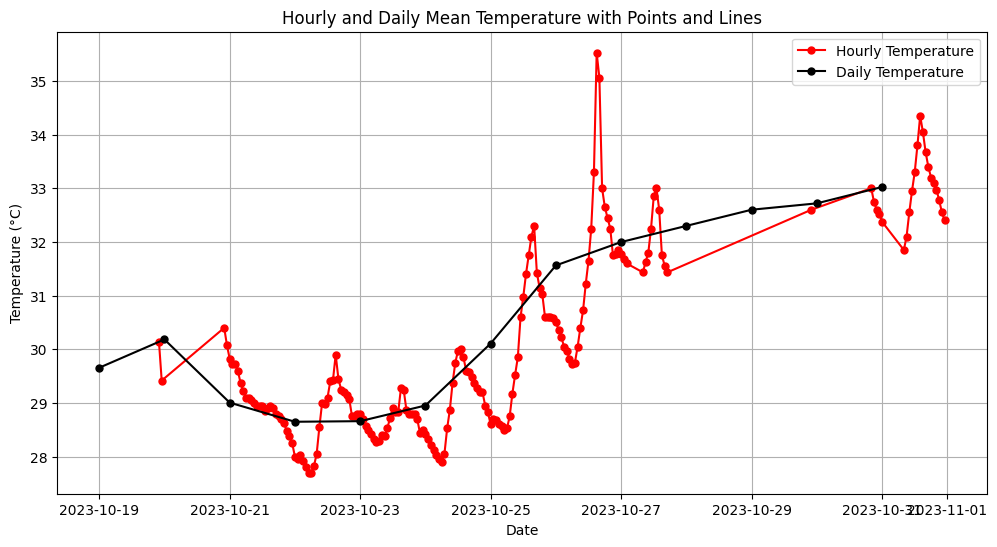

In [ ]:
selected_week = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
selected_week.set_index('Date', inplace=True)

selected_week['temperature'] = selected_week['temperature'].interpolate(method='linear')

daily_data = selected_week['temperature'].resample('D').mean()
hourly_data = selected_week['temperature'].resample('H').mean()

daily_data = daily_data.interpolate(method='linear')

# Plot the hourly and daily mean data while handling gaps
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.dropna(), marker='o', markersize=5, label='Hourly Temperature', linestyle='-', color='red')
plt.plot(daily_data.dropna(), marker='o', markersize=5, label='Daily Temperature', linestyle='-', color='black')
plt.title("Hourly and Daily Mean Temperature with Points and Lines")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

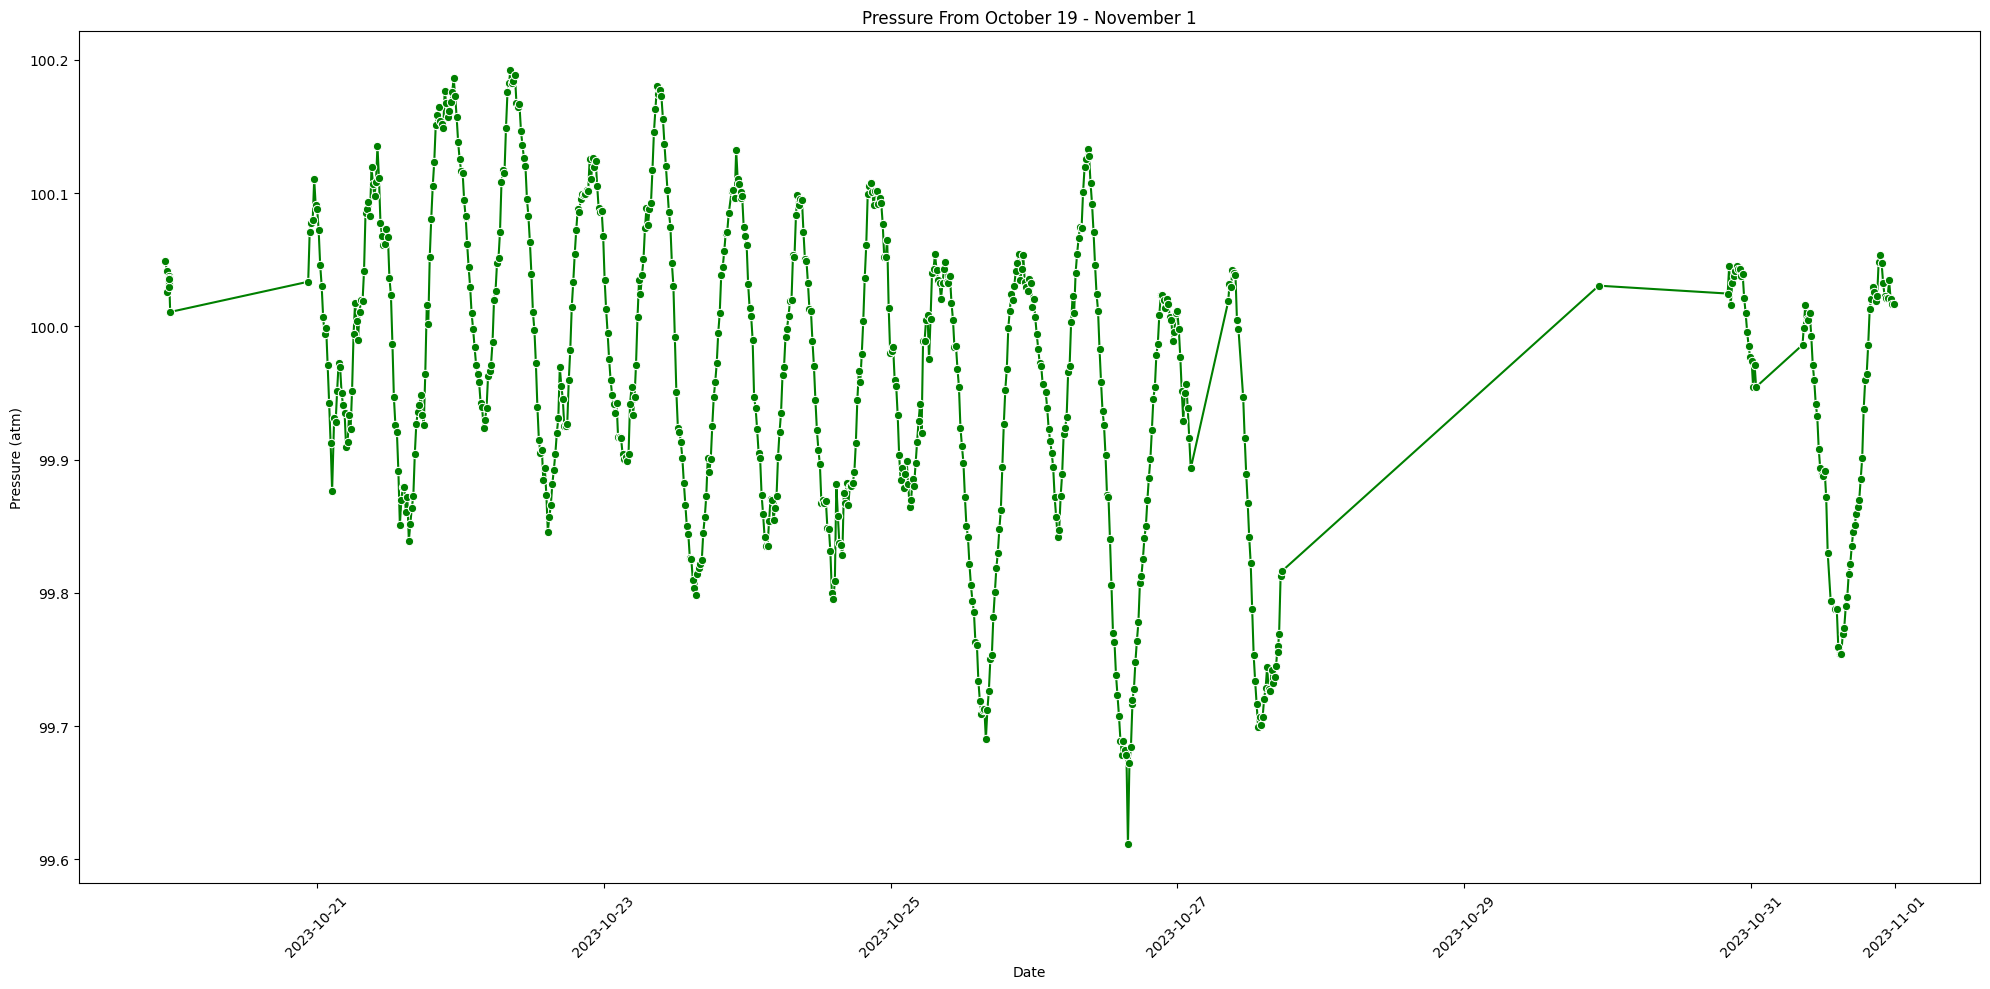

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Pressure From October 19 - November 1")
sns.lineplot(x='Date', y='pressure', data=selected_week, marker='o', color='green')
plt.xlabel("Date")
plt.ylabel("Pressure (atm)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

<ipython-input-11-d60238f59549>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_week['pressure'] = selected_week['pressure'].interpolate(method='linear')


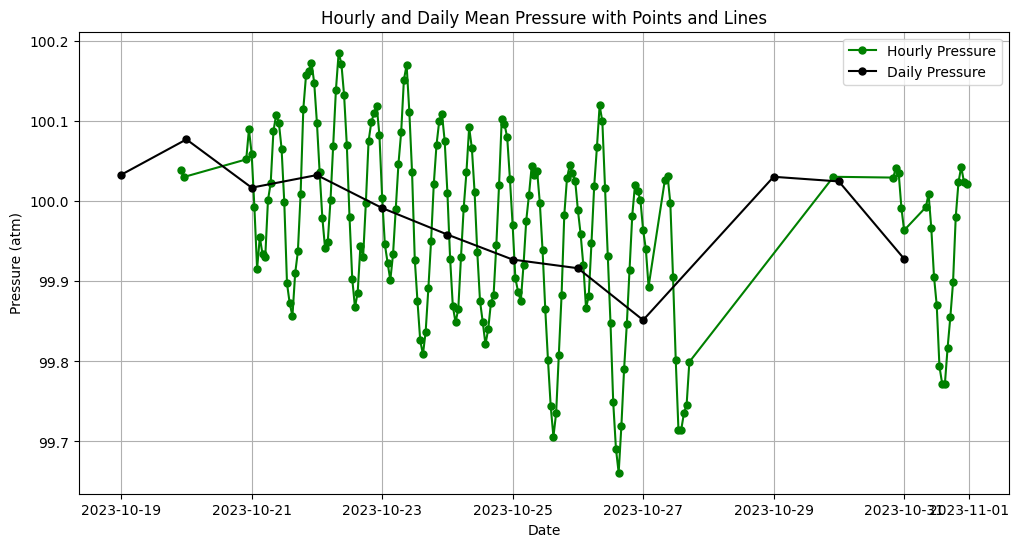

In [ ]:
# Set the 'Date' column as the index with the correct datetime data type
selected_week = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
selected_week.set_index('Date', inplace=True)

# Handle missing data in the 'pressure' column using linear interpolation
selected_week['pressure'] = selected_week['pressure'].interpolate(method='linear')

# Resample the data to get hourly and daily means for pressure
daily_data_pressure = selected_week['pressure'].resample('D').mean()
hourly_data_pressure = selected_week['pressure'].resample('H').mean()

# Plot the hourly and daily mean pressure data while handling gaps
plt.figure(figsize=(12, 6))
plt.plot(hourly_data_pressure.dropna(), marker='o', markersize=5, label='Hourly Pressure', linestyle='-', color='green')
plt.plot(daily_data_pressure.dropna(), marker='o', markersize=5, label='Daily Pressure', linestyle='-', color='black')
plt.title("Hourly and Daily Mean Pressure with Points and Lines")
plt.xlabel("Date")
plt.ylabel("Pressure (atm)")
plt.legend()
plt.grid()
plt.show()


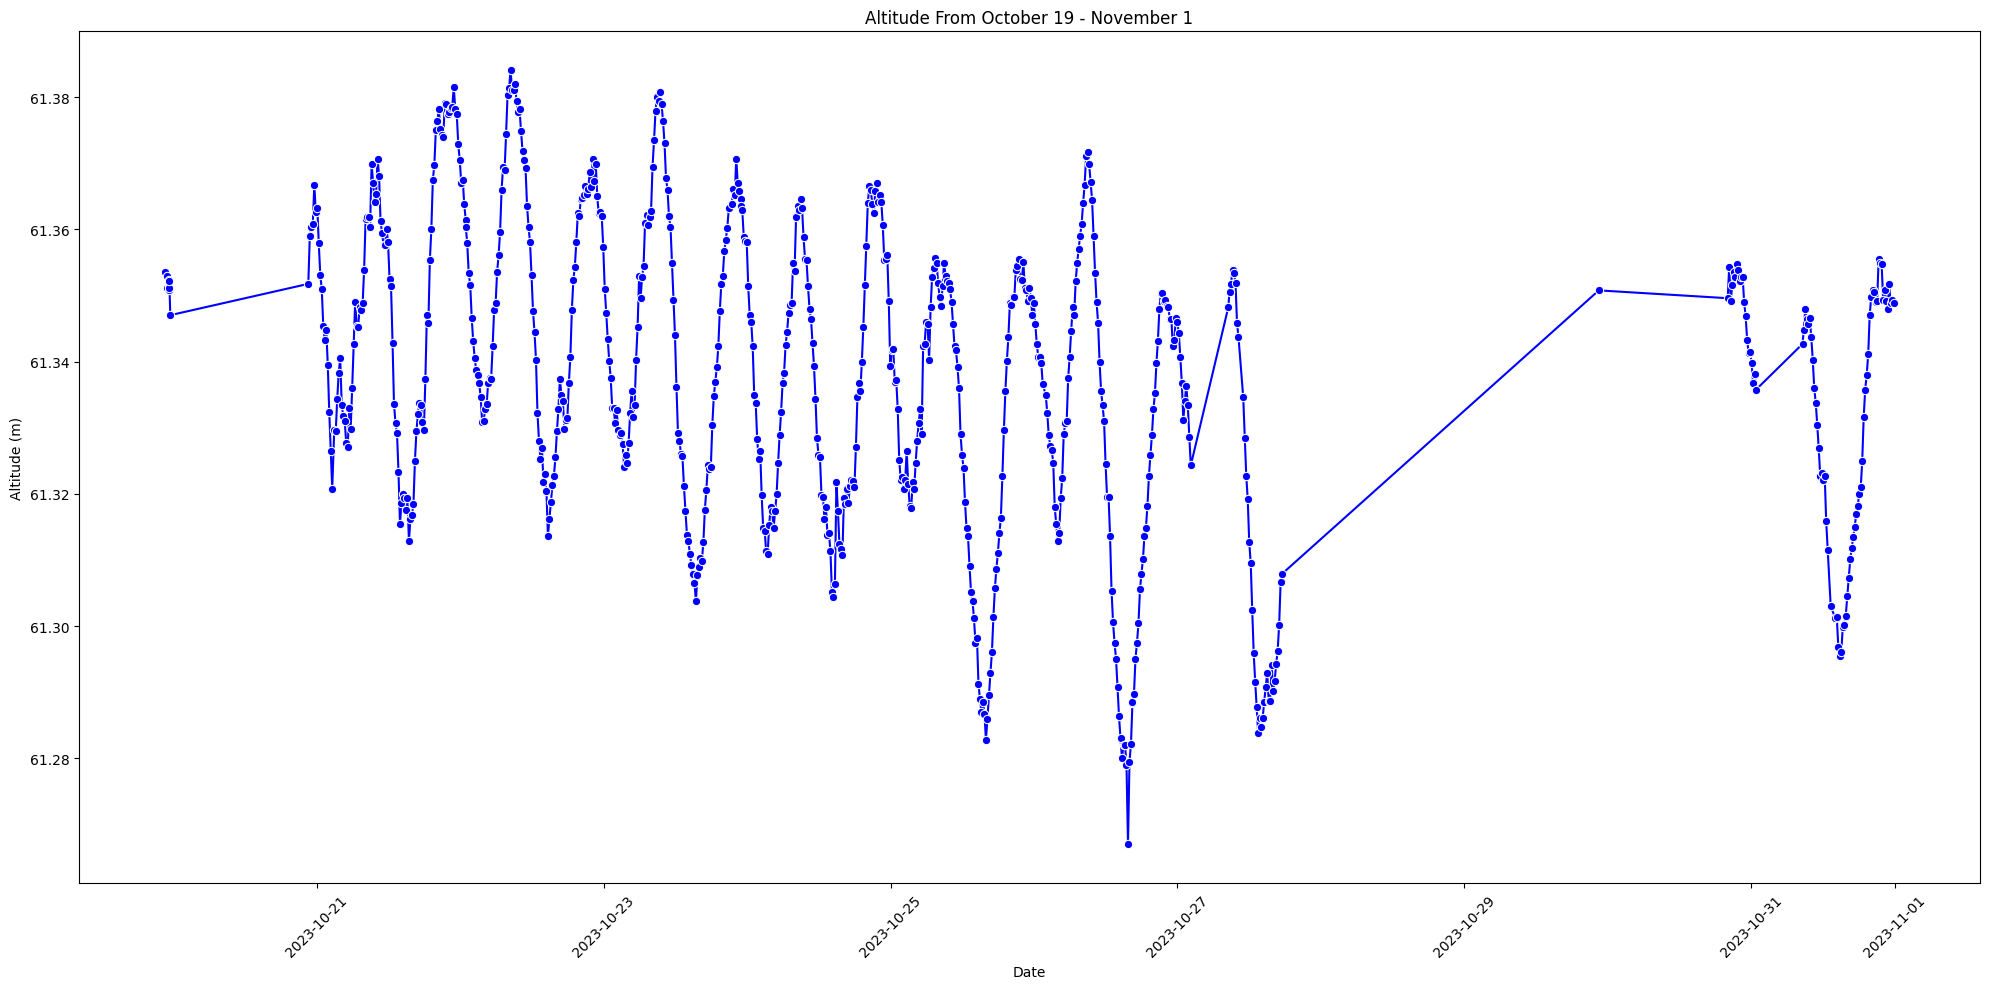

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Altitude From October 19 - November 1")
sns.lineplot(x='Date', y='altitude', data=selected_week, marker='o', color='blue')
plt.xlabel("Date")
plt.ylabel("Altitude (m)")  # Include the unit "m" in the Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

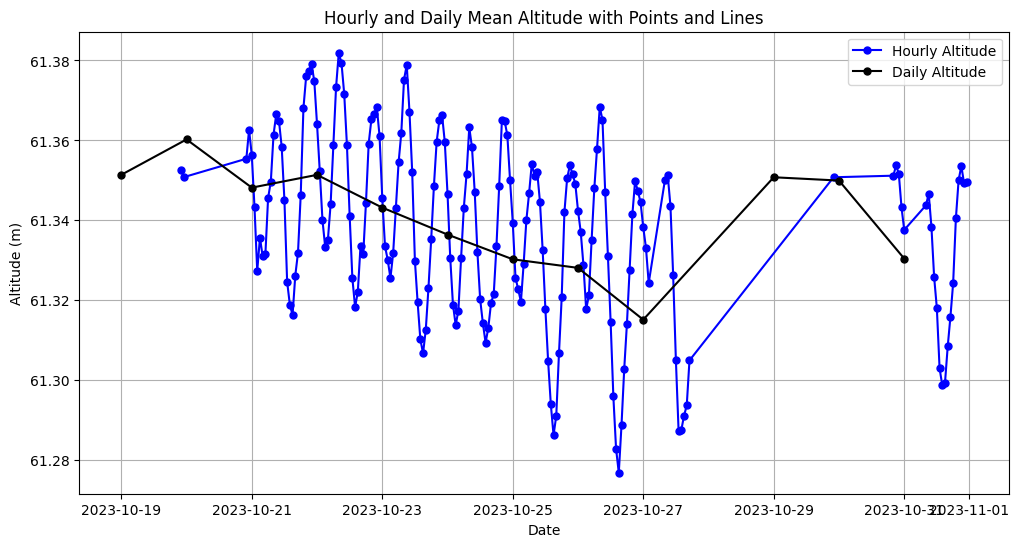

In [ ]:
# Set the 'Date' column as the index with the correct datetime data type
selected_week = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
selected_week.set_index('Date', inplace=True)

# Resample the data to get hourly and daily means for altitude
daily_data_altitude = selected_week['altitude'].resample('D').mean()
hourly_data_altitude = selected_week['altitude'].resample('H').mean()

# Plot the hourly and daily mean altitude data with points and connecting lines
plt.figure(figsize=(12, 6))
plt.plot(hourly_data_altitude.dropna(), marker='o', markersize=5, label='Hourly Altitude', linestyle='-', color='blue')
plt.plot(daily_data_altitude.dropna(), marker='o', markersize=5, label='Daily Altitude', linestyle='-', color='black')
plt.title("Hourly and Daily Mean Altitude with Points and Lines")
plt.xlabel("Date")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid()
plt.show()
